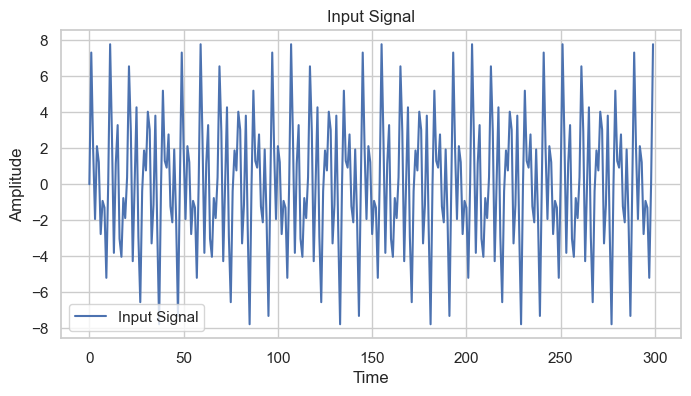

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='whitegrid')

def plot_graph(input_array, title):
    plt.figure(figsize=(8, 4))
    plt.plot(input_array, label=title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.legend()
    plt.show()
    
def plot_input_output(input_array, output_array):
    plt.figure(figsize=(8, 4))
    plt.plot(input_array, label='Input')
    plt.plot(output_array, label='Output')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Input vs Output')
    plt.legend()
    plt.show()

inputSignal = np.loadtxt('noise.csv', delimiter=',', dtype=float)

plot_graph(inputSignal[:300], title="Input Signal")

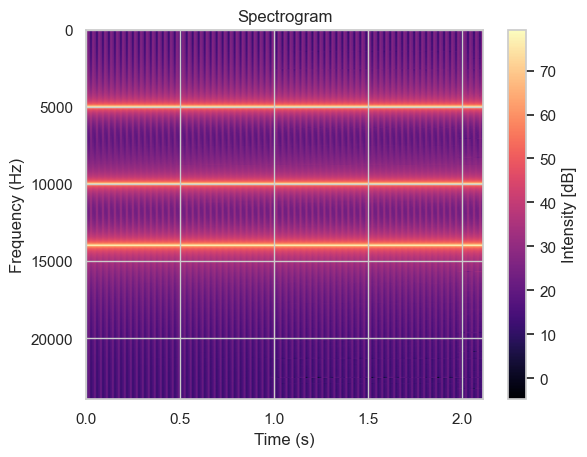

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load spectrogram data from CSV file
data = np.loadtxt('spec1.csv', delimiter=',', dtype=float)

# Extract time and spectrogram data
time = data[:, 0]
spectrogram_data = data[:, 1:]

# Calculate frequency values for the y-axis
sampling_rate = 48000  # Sampling rate in Hz
nfft = 1024  # FFT size
freq_resolution = sampling_rate / nfft  # Frequency resolution of the FFT
freq_values = np.arange(0, sampling_rate / 2, freq_resolution)  # Frequency values up to Nyquist frequency

# Plot spectrogram with frequency values on the y-axis
plt.imshow(spectrogram_data.T, aspect='auto', cmap='magma', extent=[time[0], time[-1], freq_values[-1], freq_values[0]])
plt.colorbar(label='Intensity [dB]')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram')

plt.show()


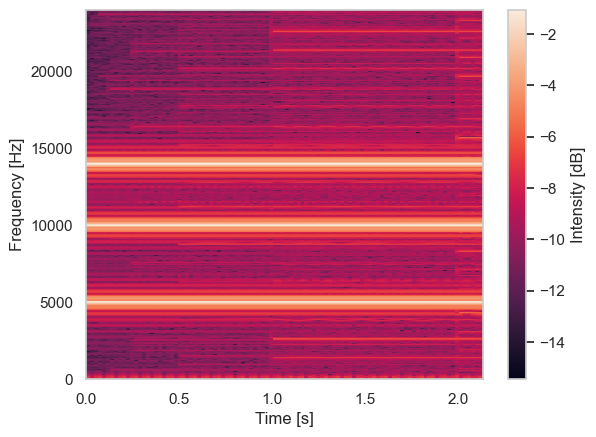

In [3]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

# Generate spectrogram
nperseg = 1024  # Length of each segment
noverlap = 0.5  # Overlap between segments
f, t, Sxx = scipy.signal.spectrogram(inputSignal, fs=48000, nperseg=nperseg, noverlap=noverlap, nfft=1024)

# Plot spectrogram
plt.pcolormesh(t, f, np.log10(Sxx))  # Convert to dB
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Intensity [dB]')
plt.show()
